<a href="https://colab.research.google.com/github/SheikhMudassarHanif/Projects-in-Python/blob/main/21F9176_NC_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

In [ ]:
# Define the system of ODEs
def f1(x, y, z):
    return -x * z  # dy/dx

def f2(x, y, z):
    return y**2  # dz/dx

# Step size and initial conditions
h = 0.2
x0, y0, z0 = 0.0, 1.0, 1.0

# Storage for results
results = [(x0, y0, z0)]

# RK4 method implementation for the first step (x = 0 to x = 0.2)
def rk4_step(x, y, z, h):
    # Calculate k1 values
    k1_y = f1(x, y, z)
    k1_z = f2(x, y, z)

    # Calculate k2 values
    k2_y = f1(x + h/2, y + h/2 * k1_y, z + h/2 * k1_z)
    k2_z = f2(x + h/2, y + h/2 * k1_y, z + h/2 * k1_z)

    # Calculate k3 values
    k3_y = f1(x + h/2, y + h/2 * k2_y, z + h/2 * k2_z)
    k3_z = f2(x + h/2, y + h/2 * k2_y, z + h/2 * k2_z)

    # Calculate k4 values
    k4_y = f1(x + h, y + h * k3_y, z + h * k3_z)
    k4_z = f2(x + h, y + h * k3_y, z + h * k3_z)

    # Update y and z using RK4 formula
    y_next = y + (h / 6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    z_next = z + (h / 6) * (k1_z + 2*k2_z + 2*k3_z + k4_z)

    return y_next, z_next

# Solve for x = 0.2 and x = 0.4
for step in range(2):  # Two steps to x = 0.2 and x = 0.4
    y_next, z_next = rk4_step(x0, y0, z0, h)
    x0 += h
    y0, z0 = y_next, z_next
    results.append((x0, y0, z0))

# Print results
for x, y, z in results:
    print(f"x = {x:.1f}, y = {y:.4f}, z = {z:.4f}")


x = 0.0, y = 1.0000, z = 1.0000
x = 0.2, y = 0.9774, z = 1.1971
x = 0.4, y = 0.8995, z = 1.3753


#Q2

x         Euler          Improved Euler      Modified Euler      Exact          
0.0       1.0000         1.0000              1.0000              1.0000         
0.1       1.1000         1.1100              1.1105              1.1103         
0.2       1.2200         1.2421              1.2432              1.2428         
0.3       1.3620         1.3985              1.4004              1.3997         
.


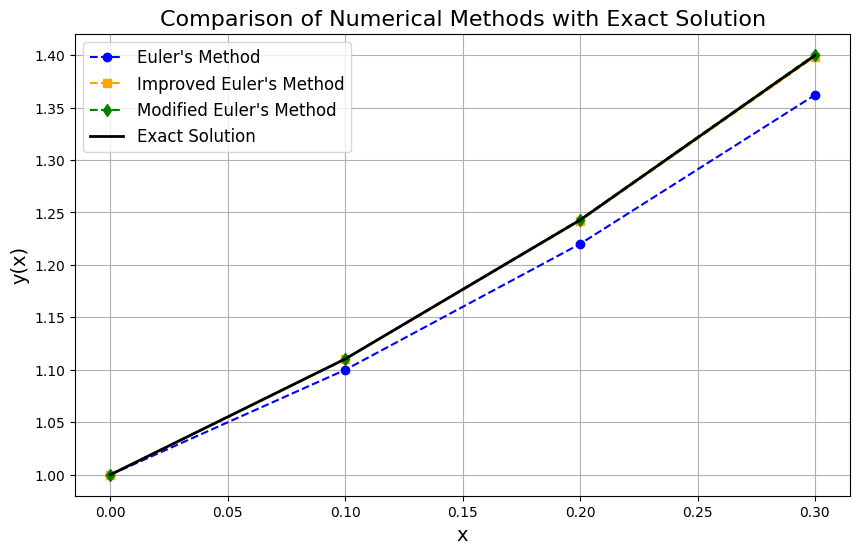

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the given ODE and exact solution
def f(x, y):
    return y + x

def exact_solution(x):
    return 2 * np.exp(x) - x - 1

# Step size and interval
h = 0.1
x_values = np.arange(0, 0.4, h)  # x ∈ [0, 0.3]
y0 = 1

# Euler's Method
def euler_method(f, x_values, y0):
    y_values = [y0]
    for i in range(len(x_values) - 1):
        y_next = y_values[-1] + h * f(x_values[i], y_values[-1])
        y_values.append(y_next)
    return y_values

# Improved Euler's Method (Heun's Method)
def improved_euler_method(f, x_values, y0):
    y_values = [y0]
    for i in range(len(x_values) - 1):
        y_pred = y_values[-1] + h * f(x_values[i], y_values[-1])
        y_next = y_values[-1] + (h / 2) * (f(x_values[i], y_values[-1]) + f(x_values[i+1], y_pred))
        y_values.append(y_next)
    return y_values

# Modified Euler's Method (Iterative Correction)
def modified_euler_method(f, x_values, y0, tol=1e-6):
    y_values = [y0]
    for i in range(len(x_values) - 1):
        y_pred = y_values[-1] + h * f(x_values[i], y_values[-1])  # Prediction step
        y_corr = y_pred
        while True:  # Iterative correction step
            y_new = y_values[-1] + (h / 2) * (f(x_values[i], y_values[-1]) + f(x_values[i+1], y_corr))
            if abs(y_new - y_corr) < tol:
                break
            y_corr = y_new
        y_values.append(y_corr)
    return y_values

# Compute solutions
y_euler = euler_method(f, x_values, y0)
y_improved_euler = improved_euler_method(f, x_values, y0)
y_modified_euler = modified_euler_method(f, x_values, y0)
y_exact = exact_solution(x_values)

# Display the results in a table format
print(f"{'x':<10}{'Euler':<15}{'Improved Euler':<20}{'Modified Euler':<20}{'Exact':<15}")
print("=" * 75)
for i in range(len(x_values)):
    print(f"{x_values[i]:<10.1f}{y_euler[i]:<15.4f}{y_improved_euler[i]:<20.4f}{y_modified_euler[i]:<20.4f}{y_exact[i]:<15.4f}")

print('.')
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_euler, 'o--', label="Euler's Method", color='blue')
plt.plot(x_values, y_improved_euler, 's--', label="Improved Euler's Method", color='orange')
plt.plot(x_values, y_modified_euler, 'd--', label="Modified Euler's Method", color='green')
plt.plot(x_values, y_exact, 'k-', label="Exact Solution", linewidth=2)

# Add titles and labels
plt.title("Comparison of Numerical Methods with Exact Solution", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#Q3

Roots of the equation and the number of iterations:
Root 1: x = 1.054351, found in 23 iterations
Root 2: x = 1.898969, found in 4 iterations
Root 3: x = 3.046680, found in 17 iterations


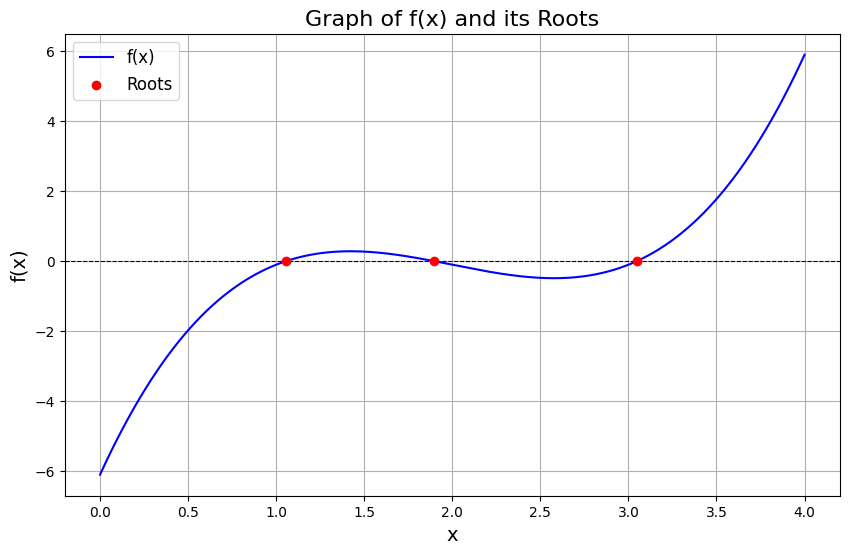

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for which we want to find the roots
def f(x):
    return x**3 - 6*x**2 + 11*x - 6.1  # Example function with roots near 1, 2, and 3

# False Position Method implementation
def false_position(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("The function must have opposite signs at a and b (root is not bracketed).")

    for i in range(max_iter):
        # Calculate the root using the formula
        c = b - (f(b) * (b - a)) / (f(b) - f(a))

        # Check if the root is found
        if abs(f(c)) < tol or abs(b - a) < tol:
            return c, i + 1  # Return root and iterations

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    raise ValueError("Maximum iterations reached without convergence.")

# Find roots of the example function
roots = []
intervals = [(0.5, 1.5), (1.5, 2.5), (2.5, 3.5)]  # Bracketing intervals for each root

for a, b in intervals:
    root, iterations = false_position(f, a, b)
    roots.append((root, iterations))

# Print the results
print("Roots of the equation and the number of iterations:")
for i, (root, iterations) in enumerate(roots):
    print(f"Root {i + 1}: x = {root:.6f}, found in {iterations} iterations")

# Plot the function and roots
x = np.linspace(0, 4, 500)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x)", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # x-axis
plt.scatter([r[0] for r in roots], [0] * len(roots), color="red", label="Roots", zorder=5)
plt.title("Graph of f(x) and its Roots", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#Q4


In [ ]:
import numpy as np

# Define the functions to choose from
def f1(x):
    return np.sin(x)  # Example: f(x) = sin(x)

def f2(x):
    return x**2  # Example: f(x) = x^2

def f3(x):
    return np.exp(-x**2)  # Example: f(x) = e^(-x^2)

def f4(x):
    return np.log(x)  # Example: f(x) = log(x)

# Function to compute the integral using Simpson's 1/3 rule
def simpsons_rule(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("The number of subintervals 'n' must be even.")

    h = (b - a) / n  # Step size
    x = np.linspace(a, b, n+1)  # Generate n+1 points from a to b

    # Evaluate the function at each point
    y = f(x)

    # Apply Simpson's 1/3 Rule
    integral = y[0] + y[-1]  # Add the first and last term
    integral += 4 * np.sum(y[1:-1:2])  # Sum the odd-indexed terms (x1, x3, x5, ...)
    integral += 2 * np.sum(y[2:-2:2])  # Sum the even-indexed terms (x2, x4, x6, ...)

    integral *= h / 3  # Multiply by h/3

    return integral

# Main program to interact with the user
def main():
    print("Select a function to integrate:")
    print("1. f(x) = sin(x)")
    print("2. f(x) = x^2")
    print("3. f(x) = e^(-x^2)")
    print("4. f(x) = log(x)")

    choice = int(input("Enter the number corresponding to your choice: "))

    # Choose the function based on user input
    if choice == 1:
        f = f1
    elif choice == 2:
        f = f2
    elif choice == 3:
        f = f3
    elif choice == 4:
        f = f4
    else:
        print("Invalid choice! Exiting the program.")
        return

    # Input for the interval [a, b] and number of subintervals n
    a = float(input("Enter the lower limit of integration (a): "))
    b = float(input("Enter the upper limit of integration (b): "))
    n = int(input("Enter the number of subintervals (n, must be even): "))

    # Compute the integral
    try:
        integral = simpsons_rule(f, a, b, n)
        print(f"The estimated integral of the function over [{a}, {b}] using Simpson's 1/3 Rule is: {integral:.6f}")
    except ValueError as e:
        print(e)

if __name__ == "__main__":
    main()


Select a function to integrate:
1. f(x) = sin(x)
2. f(x) = x^2
3. f(x) = e^(-x^2)
4. f(x) = log(x)
Enter the number corresponding to your choice: 2
Enter the lower limit of integration (a): 0
Enter the upper limit of integration (b): 5
Enter the number of subintervals (n, must be even): 4
The estimated integral of the function over [0.0, 5.0] using Simpson's 1/3 Rule is: 41.666667


#Q5

<ipython-input-6-6b179150df5e>:31: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  result += (u_term / np.math.factorial(i)) * backward_diff_table[-1, i]


Estimated population in 1975: 31.1597 thousand
Estimated population in 1977: 33.5827 thousand
Estimated population increase (1975 to 1977): 2.4230 thousand


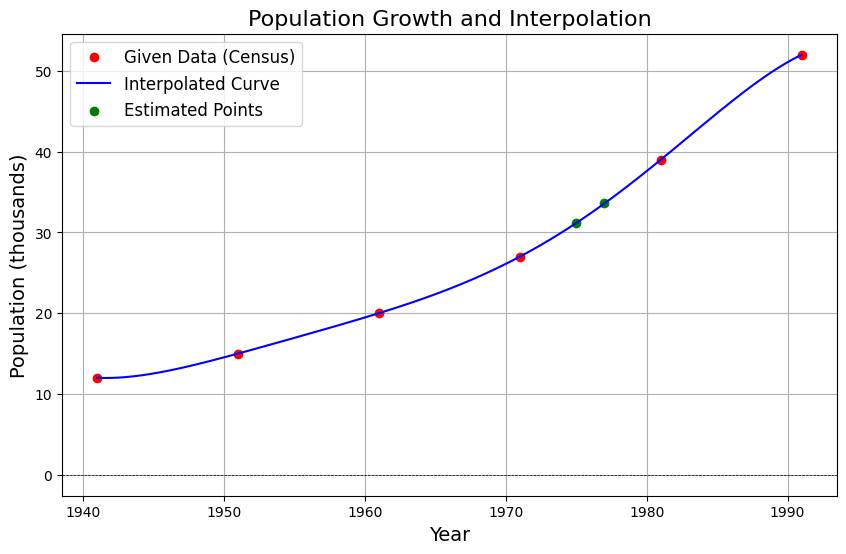

In [ ]:
import numpy as np

# Given data
years = np.array([1941, 1951, 1961, 1971, 1981, 1991])
populations = np.array([12, 15, 20, 27, 39, 52])  # In thousands

# Function to compute backward differences
def compute_backward_diff_table(values):
    n = len(values)
    table = np.zeros((n, n))
    table[:, 0] = values  # First column is the given population values
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            table[i, j] = table[i, j - 1] - table[i - 1, j - 1]
    return table

# Newton's Backward Interpolation formula
def newtons_backward_interpolation(years, values, x):
    h = years[1] - years[0]  # Step size (assumes uniform intervals)
    n = len(years)
    backward_diff_table = compute_backward_diff_table(values)

    # Calculate u
    u = (x - years[-1]) / h

    # Interpolation
    result = values[-1]
    u_term = 1
    for i in range(1, n):
        u_term *= (u + i - 1)  # Update u term
        result += (u_term / np.math.factorial(i)) * backward_diff_table[-1, i]

    return result

# Calculate population for 1975 and 1977
population_1975 = newtons_backward_interpolation(years, populations, 1975)
population_1977 = newtons_backward_interpolation(years, populations, 1977)

# Population increase from 1975 to 1977
population_increase = population_1977 - population_1975

# Print results
print(f"Estimated population in 1975: {population_1975:.4f} thousand")
print(f"Estimated population in 1977: {population_1977:.4f} thousand")
print(f"Estimated population increase (1975 to 1977): {population_increase:.4f} thousand")

# Plot the results
import matplotlib.pyplot as plt

# Generate smooth curve for interpolation
years_plot = np.linspace(1941, 1991, 500)
populations_interpolated = [newtons_backward_interpolation(years, populations, year) for year in years_plot]

plt.figure(figsize=(10, 6))
plt.plot(years, populations, 'o', label="Given Data (Census)", color="red")
plt.plot(years_plot, populations_interpolated, '-', label="Interpolated Curve", color="blue")
plt.scatter([1975, 1977], [population_1975, population_1977], color="green", label="Estimated Points")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.title("Population Growth and Interpolation", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population (thousands)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
